In [19]:
%reset -f

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


99


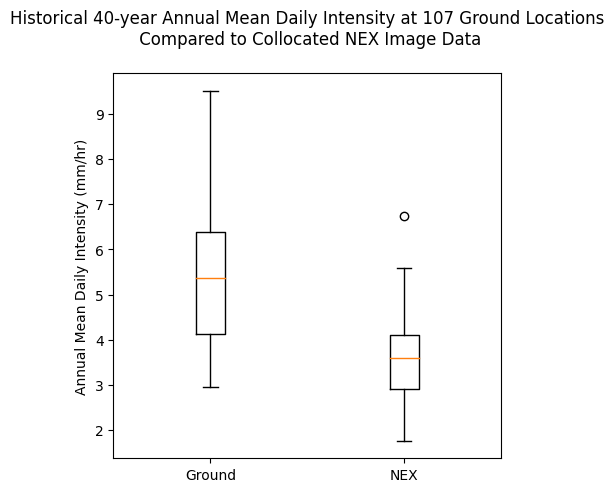

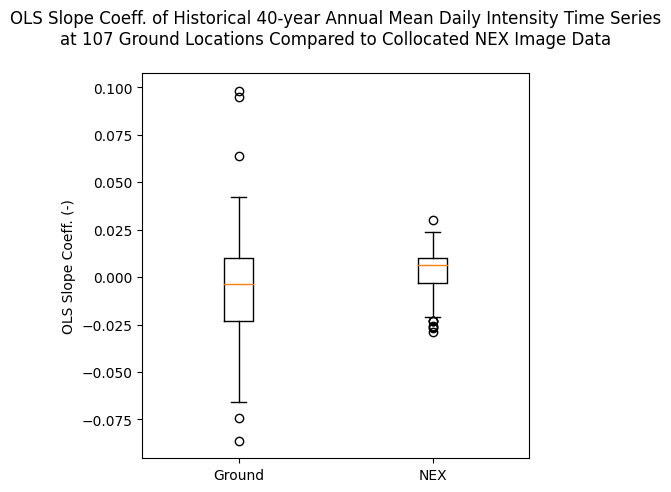

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy
import numpy as np
import os

ghcnresFILE = '/content/drive/My Drive/Colab Notebooks/GHCNd_40yr_Par_Trends_Results.csv'
nexresFILE = '/content/drive/My Drive/Colab Notebooks/NEX_40yr_Par_Trends_Results.csv'
ghcndatFILE = '/content/drive/My Drive/Colab Notebooks/GHCNd_40yr_Par_Trends_Data.csv'
nexdatFILE = '/content/drive/My Drive/Colab Notebooks/NEX_40yr_Par_Trends_Data.csv'


with open(ghcnresFILE) as f:
  lines = f.readlines()

ghcn_xyz = []
for line in lines[1:]:
  row = line.strip('\n').split(',')
  stationID = row[0]
  x = float(row[1])
  y = float(row[2])
  slope = float(row[3])
  ghcn_xyz.append([stationID, x, y, slope])

ghcn_xyz = sorted(ghcn_xyz, key=lambda element:(element[0], element[1]), reverse=True)

with open(nexresFILE) as f:
  lines = f.readlines()

nex_xyz = []
for line in lines[1:]:
  row = line.strip('\n').split(',')
  stationID = row[0]
  x = float(row[1])
  y = float(row[2])
  slope = float(row[3])
  nex_xyz.append([stationID, x, y, slope])

ghcn_ids = [elem[0] for elem in ghcn_xyz]
nex_ids = [elem[0] for elem in nex_xyz]
stationID_dict = {id:nex_ids[i] for i, id in enumerate(ghcn_ids)}



ghcn_df = pd.read_csv(ghcndatFILE)
nex_df = pd.read_csv(nexdatFILE)

ghcn = []
nex = []
for key in stationID_dict:
  ghcn.append(ghcn_df[key].mean())
  nex.append(nex_df[stationID_dict[key]].mean())

#outlier filter below
for i, val in enumerate(ghcn):
  if val > 30.:
    j = i
    print(j)
ghcn = [val for i, val in enumerate(ghcn) if i != j]
nex = [val for i, val in enumerate(nex) if i != j]
#outlier filter above

fig, ax = plt.subplots(figsize=(5, 5))

ax.boxplot([ghcn, nex])
ax.set_title('Historical 40-year Annual Mean Daily Intensity at {} Ground Locations\n Compared to Collocated NEX Image Data\n'.format(len(ghcn)))
ax.set_ylabel('Annual Mean Daily Intensity (mm/hr)')
ax.set_xticks([1, 2], ['Ground', 'NEX'])
plt.show()



ghcn = [row[3] for row in ghcn_xyz]
nex = [row[3] for row in nex_xyz]

#outlier filter below
for i, val in enumerate(ghcn):
  if val < -1.:
    j = i
ghcn = [val for i, val in enumerate(ghcn) if i != j]
nex = [val for i, val in enumerate(nex) if i != j]
#outlier filter above

fig, ax = plt.subplots(figsize=(5, 5))

ax.boxplot([ghcn, nex])
ax.set_title('OLS Slope Coeff. of Historical 40-year Annual Mean Daily Intensity Time Series\nat {} Ground Locations Compared to Collocated NEX Image Data\n'.format(len(ghcn)))
ax.set_ylabel('OLS Slope Coeff. (-)')
ax.set_xticks([1, 2], ['Ground', 'NEX'])

plt.show()


